# Using a Temporal Convolutional Network for Daytrading
## Daniel Kalam, Sharvita Paithankar

In [180]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer, Conv1D, Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
import pandas as pd
from pandas_datareader import DataReader
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Gathering Data
Getting data for 100 stocks in the date range of April 2nd, 2018 to October 9th, 2020 from yahoo finance.

In [181]:
symbols = ['AAPL', 'TSLA', 'FB', 'ROKU']# , 'BRK', 'GOOGL', 'INTC', 'AMD', 'HPE', 'ZM',
          #'CAKE', 'AET', 'F', 'KO', 'DDS', 'NVDA', 'NFLX', 'JPM', 'AMZN', 'MSFT']
#TODO: Add 80 more symbols.
source = 'yahoo'
start_date = pd.to_datetime('2019-10-09')
end_date = pd.to_datetime('2020-10-09')
stock_data_training = {}
for symbol in symbols:
    stock_data_training[symbol] = DataReader(symbol, source, start_date, end_date)
symbols2 = ['NFLX', 'ZM', 'AMZN', 'MSFT']
stock_data_validation = {}
for symbol in symbols2:
    stock_data_validation[symbol] = DataReader(symbol, source, start_date, end_date)

Create a data frame for each column in a stock's data frame.

In [182]:
stock_training_input = np.empty((20, 254, 1))
stock_training_output = np.zeros((20, 254, 2))
stock_validation_input = np.empty((20, 254, 1))
stock_validation_output = np.zeros((20, 254, 2))
i = 0
scaler = StandardScaler()
for symbol in stock_data_training:
    close_data = stock_data_training[symbol].Close
    open_data = stock_data_training[symbol].Open
    #stock_data[symbol].drop(axis= 1, columns = ['Close', 'High', 'Low', 'Volume', 'Adj Close'], inplace = True)
    stock_np = stock_data_training[symbol].Open.to_numpy().reshape(254, 1)
    stock_np = scaler.fit_transform(stock_np)
    #if stock_np.shape == stock_training_data_input[i].shape:
    stock_training_input[i, :, :] = stock_np[:, :]
    for j in range(0, len(close_data)):
        if close_data[j] > open_data[j]:
            stock_training_output[i, j, 0] = 1
            stock_training_output[i, j, 1] = 0
        else:
            stock_training_output[i, j, 0] = 0
            stock_training_output[i, j, 1] = 1
    i+=1
for symbol in stock_data_validation:
    close_data = stock_data_validation[symbol].Close
    open_data = stock_data_validation[symbol].Open
    #stock_data[symbol].drop(axis= 1, columns = ['Close', 'High', 'Low', 'Volume', 'Adj Close'], inplace = True)
    stock_np = stock_data_validation[symbol].Open.to_numpy().reshape(254, 1)
    stock_np = scaler.fit_transform(stock_np)
    #if stock_np.shape == stock_training_data_input[i].shape:
    stock_validation_input[i, :, :] = stock_np[:, :]
    for j in range(0, len(close_data)):
        if close_data[j] > open_data[j]:
            stock_validation_output[i, j, 0] = 1
            stock_validation_output[i, j, 1] = 0
        else:
            stock_validation_output[i, j, 0] = 0
            stock_validation_output[i, j, 1] = 1
    i+=1

In [183]:
# open_data['AAPL']

In [184]:
# close_data['AAPL']

In [185]:
# indicator = {}
# indicator['AAPL'] = {}
# for day in range(0, len(open_data['AAPL'])):
#     if open_data['AAPL'][day] < close_data['AAPL'][day]:
#         indicator['AAPL'][day] = True
#     else:
#         indicator['AAPL'][day] = False

# indicator['AAPL']

In [186]:
# indicator = {}
# indicator['AAPL'] = {}
# for day in open_data['AAPL'].keys():
# #     print(day)
#     if open_data['AAPL'][day] < close_data['AAPL'][day]:
#         indicator['AAPL'][str(day)[0:10]] = True
#     else:
#         indicator['AAPL'][str(day)[0:10]] = False

# indicator['AAPL']

## TensorFlow
### Converting the Data Into Tensors
Turn the data frames into tensorflow datatypes so that they can be processed by tensorflow.

In [192]:
stock_training_input

array([[[-1.33190534e+000],
        [-1.32030572e+000],
        [-1.25560514e+000],
        ...,
        [ 1.65114978e+000],
        [ 1.73518299e+000],
        [ 1.68517535e+000]],

       [[-1.14746125e+000],
        [-1.14088372e+000],
        [-1.13777765e+000],
        ...,
        [ 1.93871407e+000],
        [ 2.09293735e+000],
        [ 2.02392310e+000]],

       [[-1.10250589e+000],
        [-1.06787890e+000],
        [-1.01325242e+000],
        ...,
        [ 1.28704689e+000],
        [ 1.30316655e+000],
        [ 1.44555434e+000]],

       ...,

       [[ 0.00000000e+000],
        [ 2.24711642e+307],
        [ 2.24711749e+307],
        ...,
        [ 2.24711749e+307],
        [ 2.24711749e+307],
        [ 2.24711749e+307]],

       [[ 0.00000000e+000],
        [ 0.00000000e+000],
        [ 0.00000000e+000],
        ...,
        [ 2.24711749e+307],
        [ 0.00000000e+000],
        [ 0.00000000e+000]],

       [[ 2.24711642e+307],
        [ 2.24711749e+307],
        [ 2.2471

In [187]:
delete = []
for j in range(i, 20):
    delete.append(j)
stock_training_input = np.delete(stock_training_input, delete, axis=0)
stock_training_output = np.delete(stock_training_output, delete, axis=0)

stock_validation_input = np.delete(stock_training_input, delete, axis=0)
stock_validation_output = np.delete(stock_training_output, delete, axis=0)

<ipython-input-187-dbceed9d368c>:7: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  stock_validation_input = np.delete(stock_training_input, delete, axis=0)
<ipython-input-187-dbceed9d368c>:8: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  stock_validation_output = np.delete(stock_training_output, delete, axis=0)


In [193]:
stock_training_input

array([[[-1.33190534e+000],
        [-1.32030572e+000],
        [-1.25560514e+000],
        ...,
        [ 1.65114978e+000],
        [ 1.73518299e+000],
        [ 1.68517535e+000]],

       [[-1.14746125e+000],
        [-1.14088372e+000],
        [-1.13777765e+000],
        ...,
        [ 1.93871407e+000],
        [ 2.09293735e+000],
        [ 2.02392310e+000]],

       [[-1.10250589e+000],
        [-1.06787890e+000],
        [-1.01325242e+000],
        ...,
        [ 1.28704689e+000],
        [ 1.30316655e+000],
        [ 1.44555434e+000]],

       ...,

       [[ 0.00000000e+000],
        [ 2.24711642e+307],
        [ 2.24711749e+307],
        ...,
        [ 2.24711749e+307],
        [ 2.24711749e+307],
        [ 2.24711749e+307]],

       [[ 0.00000000e+000],
        [ 0.00000000e+000],
        [ 0.00000000e+000],
        ...,
        [ 2.24711749e+307],
        [ 0.00000000e+000],
        [ 0.00000000e+000]],

       [[ 2.24711642e+307],
        [ 2.24711749e+307],
        [ 2.2471

### Temporal Convolutional Network Class

In [188]:
filter_count = 2 # Amount of filters
final_filter_count = 2
filters = [] # Filter size for each residual block
kernel_size = 10 #Resolution of each filter
level = kernel_size
n = 0
while level <= 254:
    filters.append(filter_count)
    level+=kernel_size + (kernel_size-1)*2**n
    n+=1
filters[-1] = final_filter_count

In [189]:
class ResidualBlock(Layer):
    def __init__(self, filters, kernel_size, strides, dilation_rate, activation,
                trainable, dropout, dtype=None, activity_regularizer=None, **kwargs):
        super(ResidualBlock, self).__init__(trainable, dtype=dtype)
        self.activation = activation
        self.dropout = dropout
        self.filters = filters
        self.adjust_sample = None
        self.layer_norm = BatchNormalization(axis=-1)
        self.dilatedcausal1 = Conv1D(filters,
                                     kernel_size,
                                     strides,
                                     'causal',
                                     dilation_rate=dilation_rate)
        self.dilatedcausal2 = Conv1D(filters,
                                     kernel_size,
                                     strides,
                                     'causal',
                                     dilation_rate=dilation_rate)

    #Make the dropout based on the shape of the input
    def build(self, input_shape):
        self.drop1 = Dropout(self.dropout, input_shape)
        self.drop2 = Dropout(self.dropout, input_shape)
        if input_shape[2]!=filters:
            self.adjust_sample = Dense(self.filters)

    #The residual block processes the input
    def call(self, inputs, training):
        x = self.dilatedcausal1(inputs)
        x = self.layer_norm(x, training)
        x = self.activation(x)
        x = self.drop1(x, training) #If training is False, drop1 simply returns x
        x = self.dilatedcausal2(x)
        x = self.layer_norm(x, training)
        x = self.activation(x)
        x = self.drop2(x, training) #If training is False, drop2 simply returns x
        if self.adjust_sample is not None:
            inputs = self.adjust_sample(inputs)
        return self.activation(x+inputs)
        
class TCN(Model):
    def __init__(self, filters, kernel_size=2, dropout = 0.2, activation='relu',
                trainable=False, dtype=None, name=None,
                activity_regularizer=None, **kwargs):
        super(TCN, self).__init__()
        self.levels = []
        for i in range(0, len(filters)):
            self.levels.append(ResidualBlock(filters[i], kernel_size,
                                             1, 2**i, Activation(activation),
                                             trainable, dropout,
                                             dtype, activity_regularizer))
    
    #Running the input through each residual block
    def call(self, inputs, training=True):
        for r_block in self.levels:
            inputs = r_block(inputs, training)
        return inputs
stock_training_output[0].shape

(254, 2)

### Training the TCN

In [190]:

tcn_model = TCN(filters, kernel_size, activation='relu', trainable = True, dtype='float')
tcn_model.compile(optimizer='adam', loss = 'mse', metrics=['accuracy'])
tcn_model.fit(stock_training_input, stock_training_output, epochs = 250, validation_data=(stock_validation_input, stock_validation_output))

Epoch 1/250
1/1 [==============================] - 0s 444ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 2/250
1/1 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 3/250
1/1 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 4/250
1/1 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 5/250
1/1 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 6/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 7/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 8/250
1/1 [==============================] - 0s 13ms/st

Epoch 62/250
1/1 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 63/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 64/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 65/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 66/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 67/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 68/250
1/1 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 69/250
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 123/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 124/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 125/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 126/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 127/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 128/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 129/250
1/1 [==============================] - 0s 14ms/s

1/1 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 183/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 184/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 185/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 186/250
1/1 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 187/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 188/250
1/1 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 189/250
1/1 [==============================] - 0s 14ms/s

1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 243/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 244/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 245/250
1/1 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 246/250
1/1 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 247/250
1/1 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 248/250
1/1 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.7707 - val_loss: nan - val_accuracy: 0.7707
Epoch 249/250
1/1 [==============================] - 0s 14ms/s

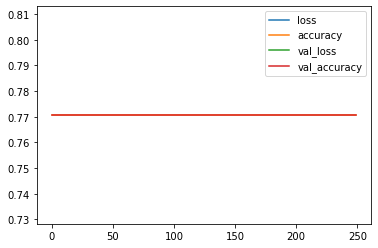

In [191]:
losses = pd.DataFrame(tcn_model.history.history)
losses.plot()